In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, CuDNNLSTM
import matplotlib.pyplot as plt

In [66]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [67]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [68]:
x_train = x_train/255.0
y_train = y_train/255.0

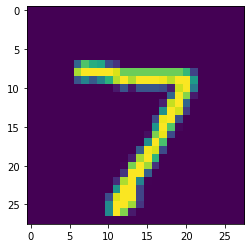

In [69]:
plt.imshow(x_test[0])  # graph it
plt.show() 

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_train.shape[1:]

(28, 28)

In [72]:
model = Sequential()

In [75]:
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))

In [76]:
model.add(Dropout(0.2))

In [77]:
model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

In [78]:
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))

In [79]:
model.add(Dense(10, activation='softmax'))

In [80]:

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

In [81]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [83]:
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples


InternalError: GPU sync failed